# **Applied Machine Learning**
## Frame
The predict which customer is likely to default

In [9]:
# Get data
! pip install plotnine
import numpy as np , pandas as pd, matplotlib.pyplot as plt , plotnine
%matplotlib inline

In [0]:
data = pd.read_csv('./historical_loan.csv')

In [16]:
data.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.00,RENT,19200.00,24
1,1,6500,A,2.00,MORTGAGE,66000.00,28
2,0,2400,A,2.00,RENT,60000.00,36
3,0,10000,C,3.00,RENT,62000.00,24
4,1,4000,C,2.00,RENT,20000.00,28


# Refine dataset
## Find missing value
python package : missingno : to build corelation on missing numbers


In [23]:
data.isnull().head()

,default,amount,grade,years,ownership,income,age
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [22]:
data.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [0]:
# Replace with missing value with mean
# Mean: if less data , Median : if huge data

data.years = data.years.fillna(data.years.mean())


## Explore *data*


*   Single
*   Dual and three
slideshare : multidim viz :https://www.slideshare.net/amitkaps/visualising-multi-dimensional-data-fifth-elephant-talk




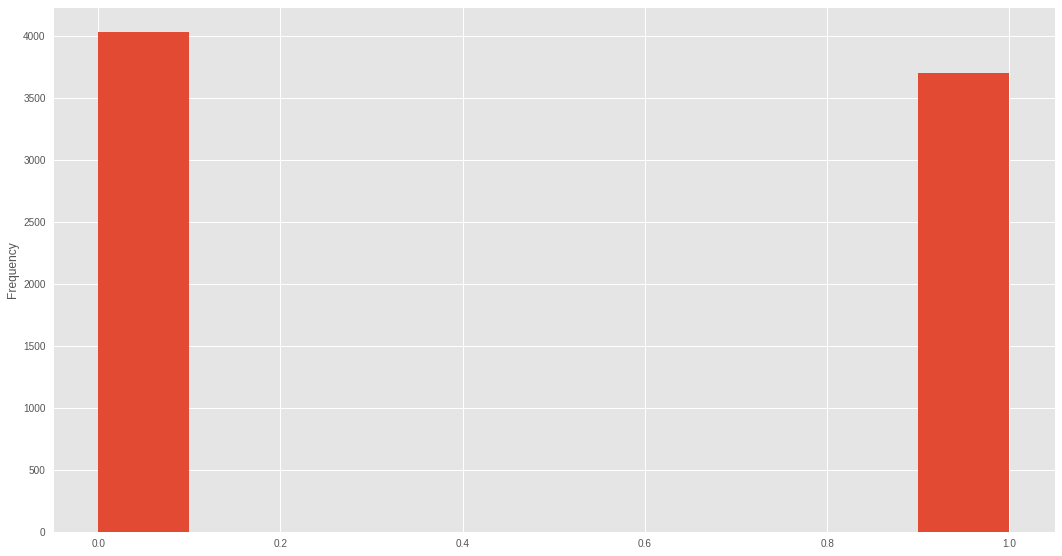

In [28]:
# 1D quantitative 

plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

data.default.plot(kind='hist')

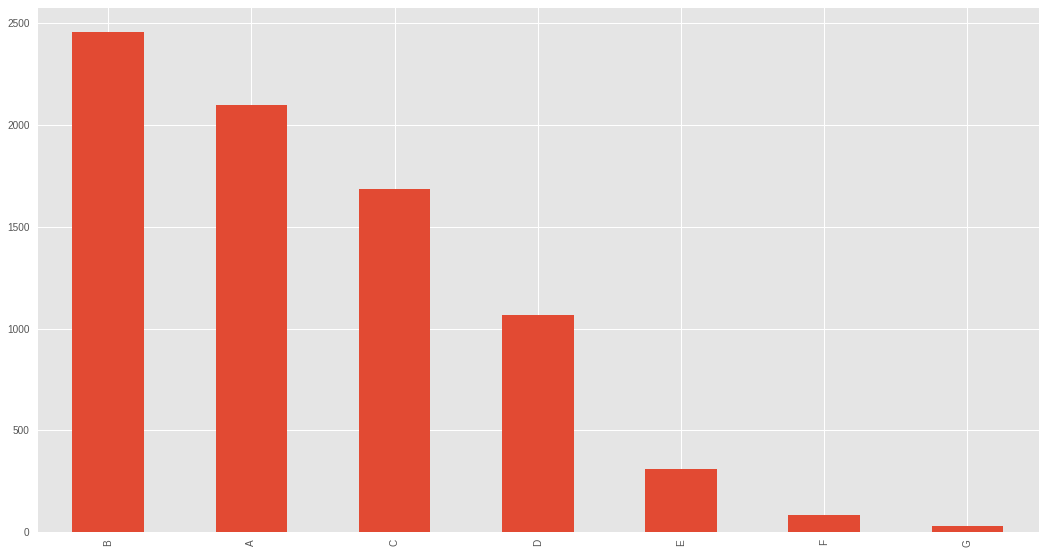

In [30]:
# 1D categorical
data.grade.value_counts()
data.grade.value_counts().plot(kind='bar')

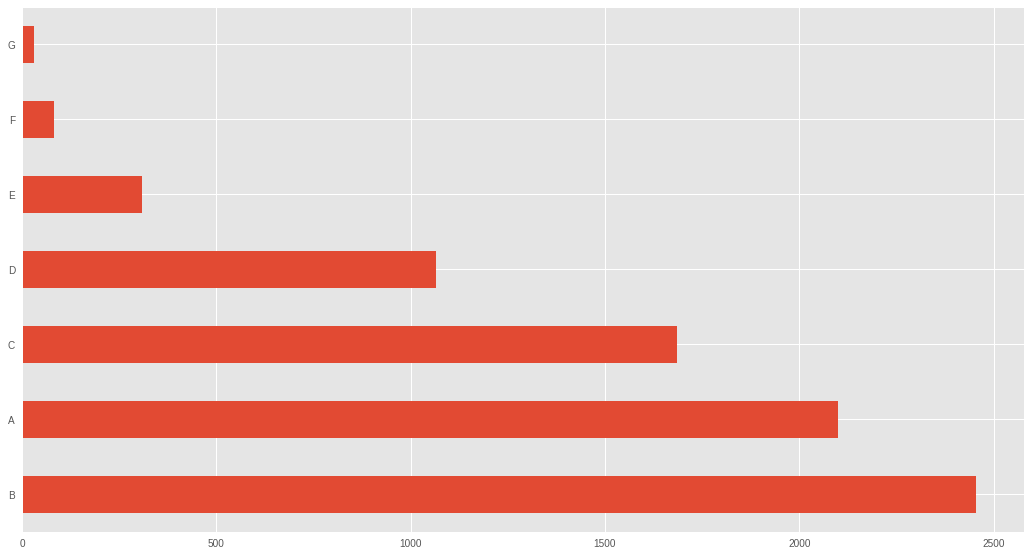

In [31]:
data.grade.value_counts().plot(kind='barh')

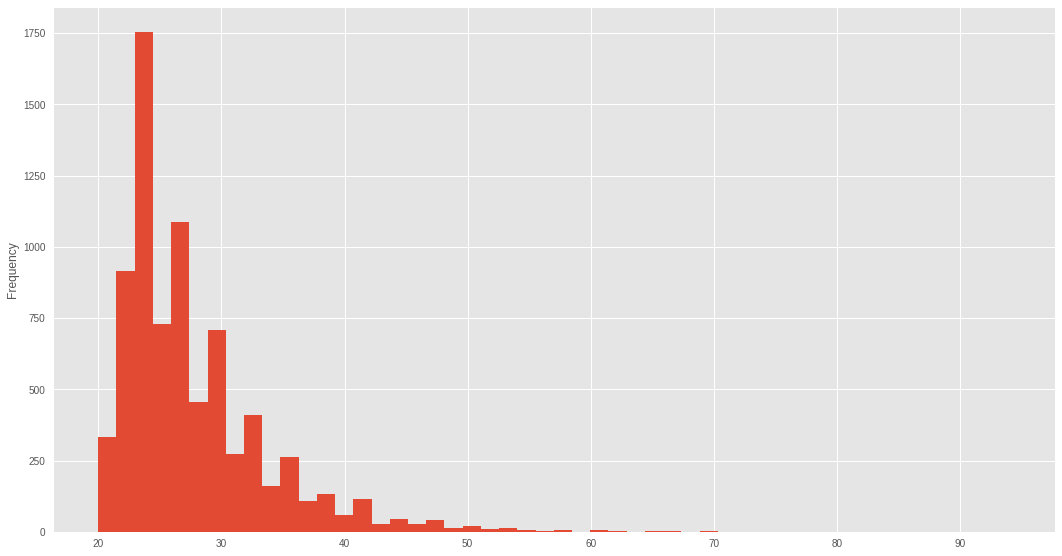

In [37]:
data.age.plot(kind = 'hist',bins =50)

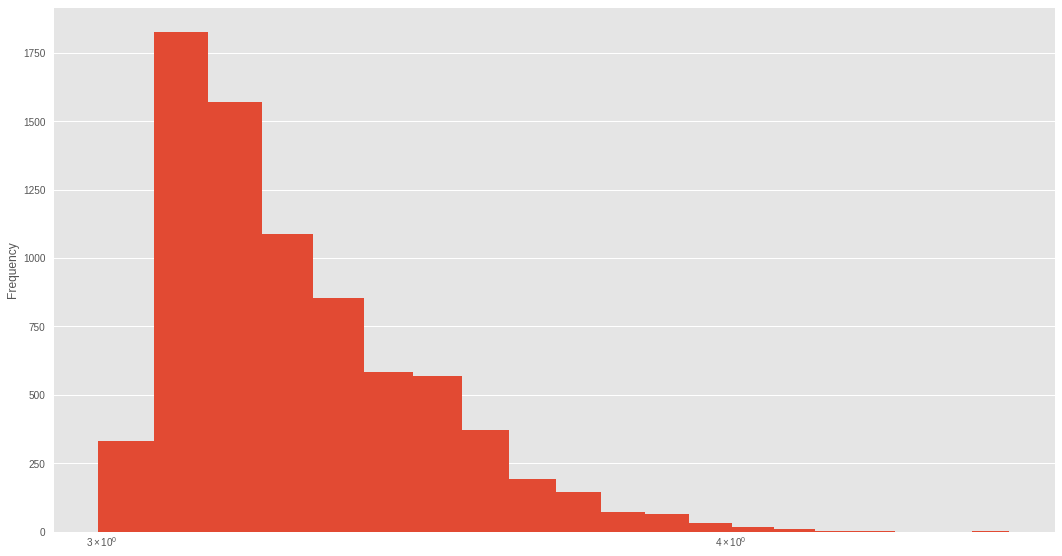

In [47]:
# use log to measure the order of the data point. mostly used it the data is left skewd

data['log_age']= np.log(data.age)
data.log_age.plot(kind = 'hist',bins =20 ,logx=True)

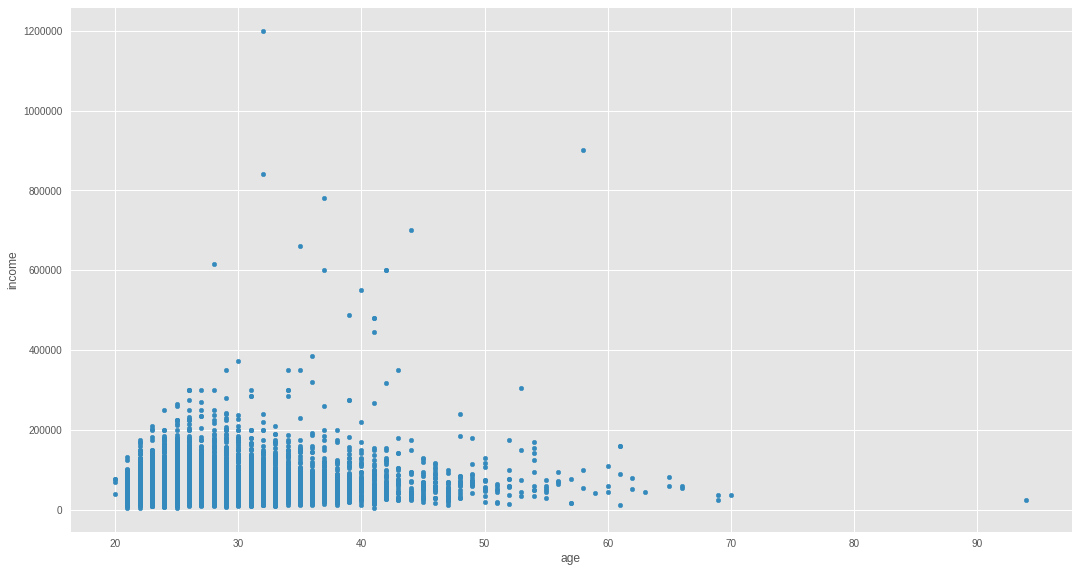

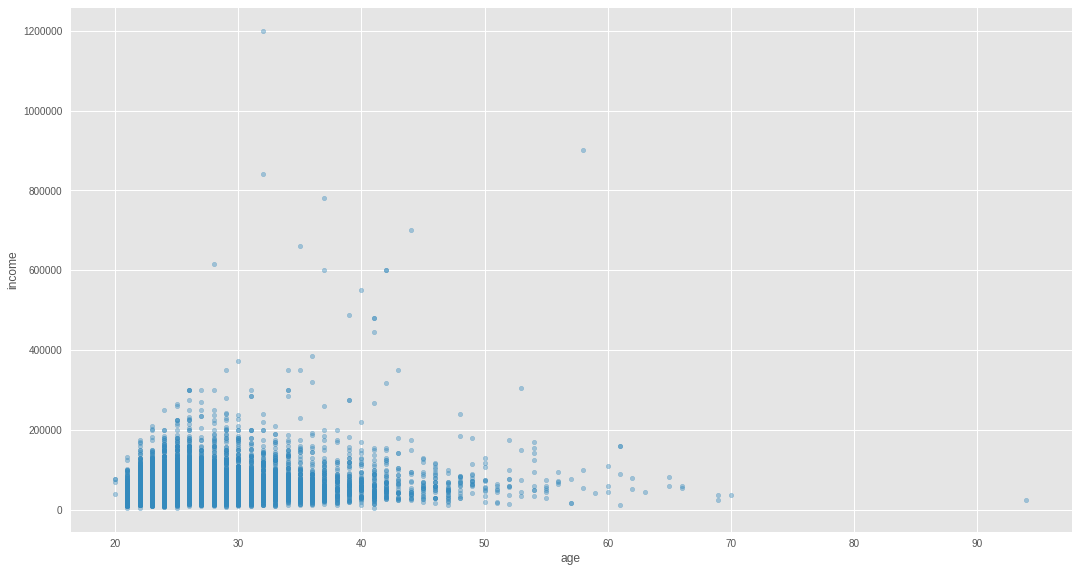

In [49]:
# Dual variable Exploration

data.plot.scatter(x='age', y ='income')
# to see more data , which got over plot use alpha
data.plot.scatter(x='age', y ='income' , alpha = 0.4)


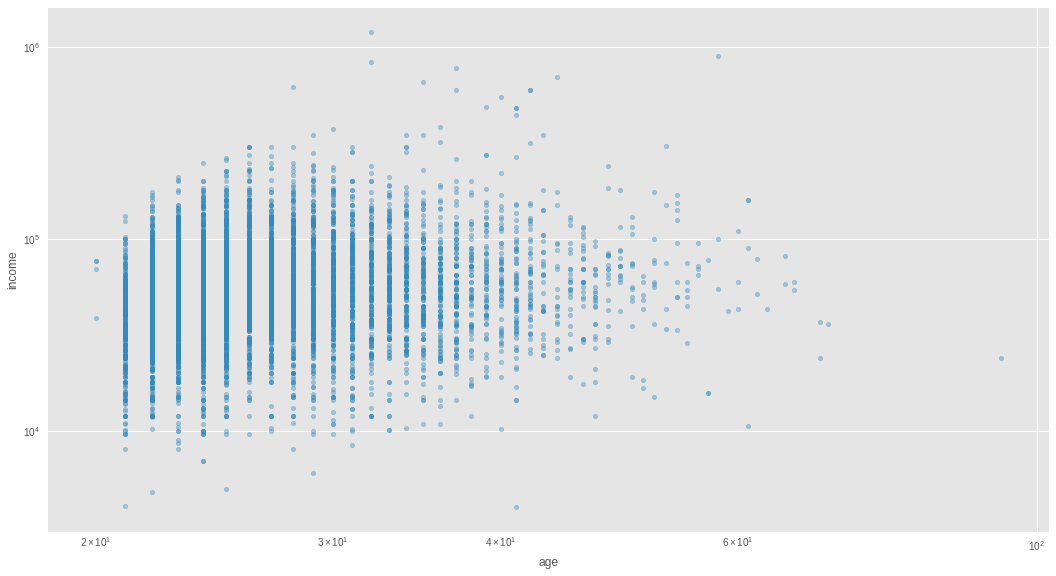

In [50]:
data.plot.scatter(x='age', y ='income' , logx =True , logy= True , alpha=0.4)

#Transformation

**Pre_Processing**
*   Scaling - log transfoatmtion
*   Normalization (for continues variable - Ratio )
*   Standard Scler (for continues vaiables - interval)
*   Encoding for categorical ( One Hot encoding, label encoding)




In [54]:
del data['age_log']
data.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.00,RENT,19200.00,24
1,1,6500,A,2.00,MORTGAGE,66000.00,28
2,0,2400,A,2.00,RENT,60000.00,36
3,0,10000,C,3.00,RENT,62000.00,24
4,1,4000,C,2.00,RENT,20000.00,28


In [56]:
# Preporcessing Sklearn
# Get dummies from pandas

## We did one hot encoding
data_encoded = pd.get_dummies(data)
data_encoded.head()

,default,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,0,1000,2.00,19200.00,24,0,1,0,0,0,0,0,0,0,0,1
1,1,6500,2.00,66000.00,28,1,0,0,0,0,0,0,1,0,0,0
2,0,2400,2.00,60000.00,36,1,0,0,0,0,0,0,0,0,0,1
3,0,10000,3.00,62000.00,24,0,0,1,0,0,0,0,0,0,0,1
4,1,4000,2.00,20000.00,28,0,0,1,0,0,0,0,0,0,0,1


# Model

**Get the X and Y**

In [0]:
X_2 = data_encoded.loc[:,('age','amount')]

In [0]:
y = data_encoded.loc[:,'default']

In [0]:
#Build tht model

from sklearn import tree

In [0]:
# Instantiate the model
clf_dt = tree.DecisionTreeClassifier(max_depth=2)

#fit the  decisoin tree


clf_dt = clf_dt.fit(X_2,y)

# Visualise the Tree


In [80]:
! pip install pydotplus
import pydotplus
from IPython.display import Image


In [0]:
dot_data = tree.export_graphviz(clf_dt, out_file="tree.dot", 
                                feature_names=X_2.columns, 
                                class_names=["no","yes"],
                                filled=True, rounded=True
                               )

In [0]:
graph = pydotplus.graph_from_dot_file('tree.dot')


In [0]:
Image(graph.create_png())


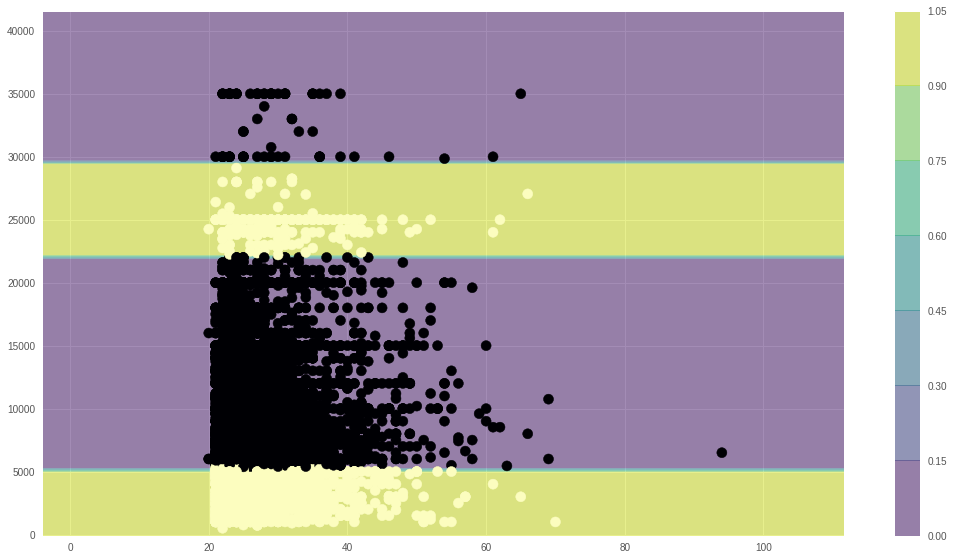

In [88]:
def plot_classifier_2d(clf, data):
    pad = 1.2
    
    x_min, x_max = data.iloc[:,0].min()*(1-pad), data.iloc[:,0].max()*pad
    y_min, y_max = data.iloc[:,1].min()*(1-pad), data.iloc[:,1].max()*pad
    
#     Create a mesh point
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, (x_max - x_min)/100), 
        np.arange(y_min, y_max, (y_max - y_min)/100))
#     Predict
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    target  = clf.predict(data)
#     Plot
    cs = plt.contourf(xx, yy, Z, cmap="viridis", alpha = 0.5)
    plt.colorbar(cs)
    plt.scatter(x = data.iloc[:,0], y = data.iloc[:,1], c = target, s = 100, cmap="magma")

plot_classifier_2d(clf_dt, X_2)

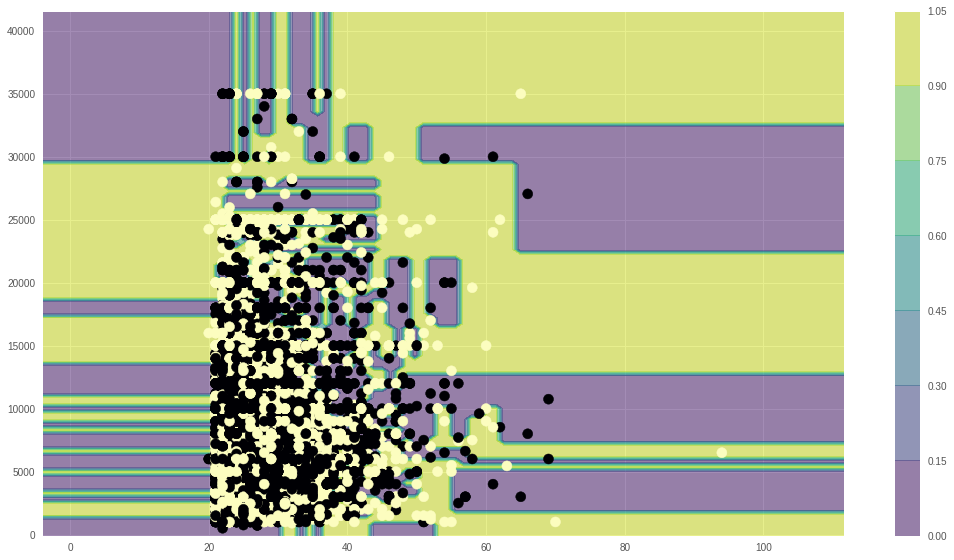

In [94]:
# Testing the model with multiple depth

# Instantiate the model
clf_dt = tree.DecisionTreeClassifier(max_depth=100).fit(X_2,y)

plot_classifier_2d(clf_dt, X_2)

# Model Validation
Undestand prediction class and probalilities


In [0]:
X = data_encoded.iloc[:,1:]
y = data_encoded.iloc[:,0]


In [0]:
clf_dt = tree.DecisionTreeClassifier(max_depth=5).fit(X,y)


In [0]:
def pred_df(clf , X, y):
  clf = clf.fit(X,y)
  y_pred = clf.predict(X)
  y_prob = clf.predict_proba(X)[:,1]
  pred_df = pd.DataFrame(  {"actual":   y,
                           "predict":   y_pred,
                            "probablty":y_prob
                           } 
                        )
  return pred_df



prediction_dt_5 = pred_df(clf_dt,X,y)  

In [114]:
prediction_dt_5.head(10)

,actual,predict,probablty
0,0,1,0.63
1,1,0,0.24
2,0,0,0.10
3,0,1,0.66
4,1,1,0.66
5,1,0,0.40
6,1,1,0.66
7,0,1,0.66
8,0,0,0.24
9,0,0,0.24


In [115]:
pd.crosstab(prediction_dt_5.predict, prediction_dt_5.actual)

actual,0,1
predict,,
0,2765,1433
1,1265,2264


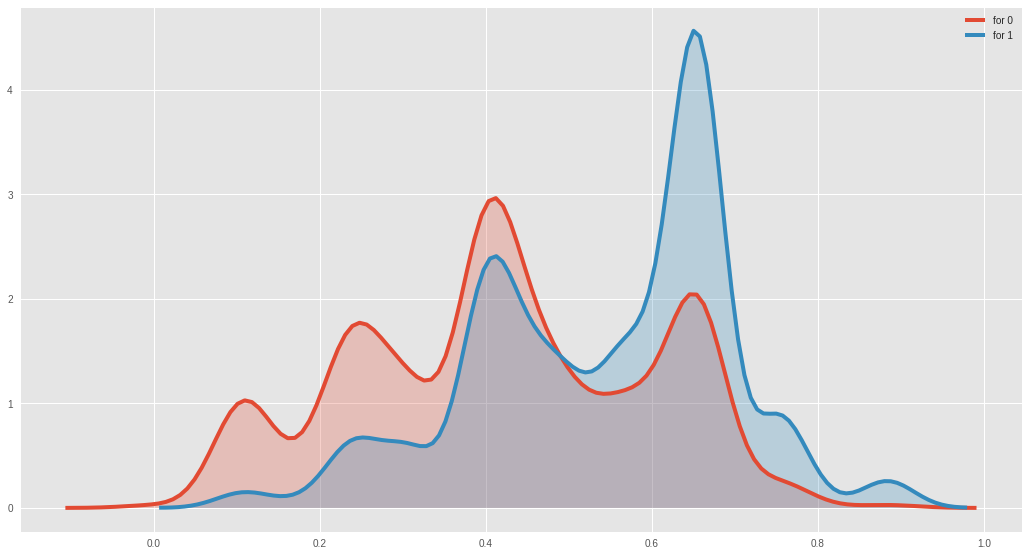

In [118]:
import seaborn as sns

def plot_predcitions(pred_df):
  pred_df_0 = pred_df[pred_df.actual ==0]
  pred_df_1 = pred_df[pred_df.actual ==1]
  sns.kdeplot(pred_df_0.probablty , shade = True , label ="for 0")
  sns.kdeplot(pred_df_1.probablty , shade = True , label ="for 1")  

  
plot_predcitions(prediction_dt_5)

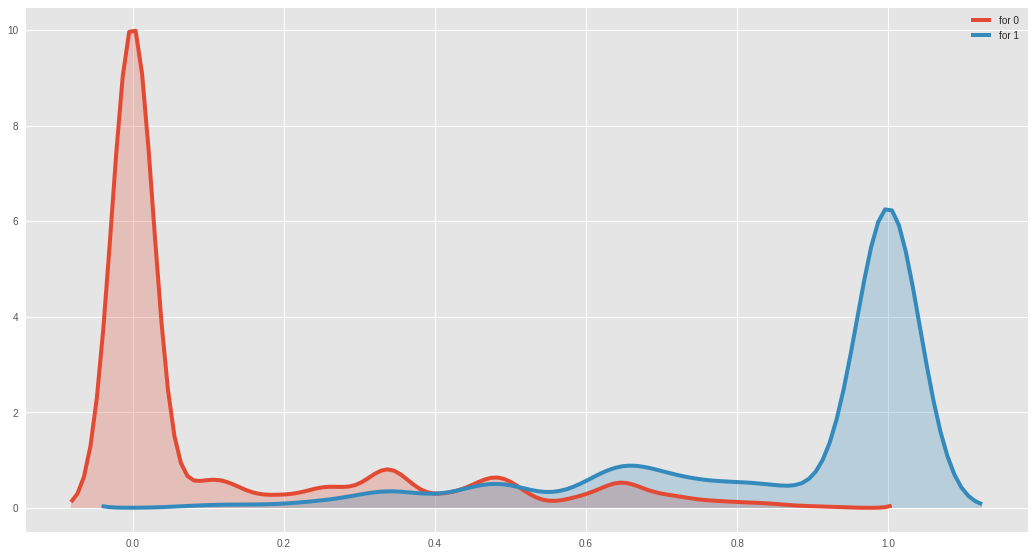

In [130]:
clf_dt = tree.DecisionTreeClassifier(max_depth=16).fit(X,y)
prediction_dt_20 = pred_df(clf_dt,X,y)  
plot_predcitions(prediction_dt_20)

In [0]:
from sklearn import tree
from sklearn import metrics
# TPR needs to be always high to be the best model which will be the largest area under the curve 

def model_evaluation(data, target, model, model_name):
    model_fit = model.fit(data, target)
    pred = model_fit.predict(data)
    proba = model_fit.predict_proba(data)
    
    fpr, tpr, thresholds = metrics.roc_curve(target, proba[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    
    print("Model: %s" % model_name)

    # Scores for the model
    print("accuracy: %.3f" % metrics.accuracy_score(target, pred))
    print("recall: %.3f" % metrics.precision_score(target, pred))
    print("precision: %.3f" % metrics.recall_score(target, pred))
    print("confusion_matrix:")
    print(metrics.confusion_matrix(target, pred))
    print("auc: %.3f" % metrics.auc(fpr, tpr))
    
    # ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return roc_auc
  
  

Model: depth=5
accuracy: 0.651
recall: 0.642
precision: 0.612
confusion_matrix:
[[2765 1265]
 [1433 2264]]
auc: 0.701


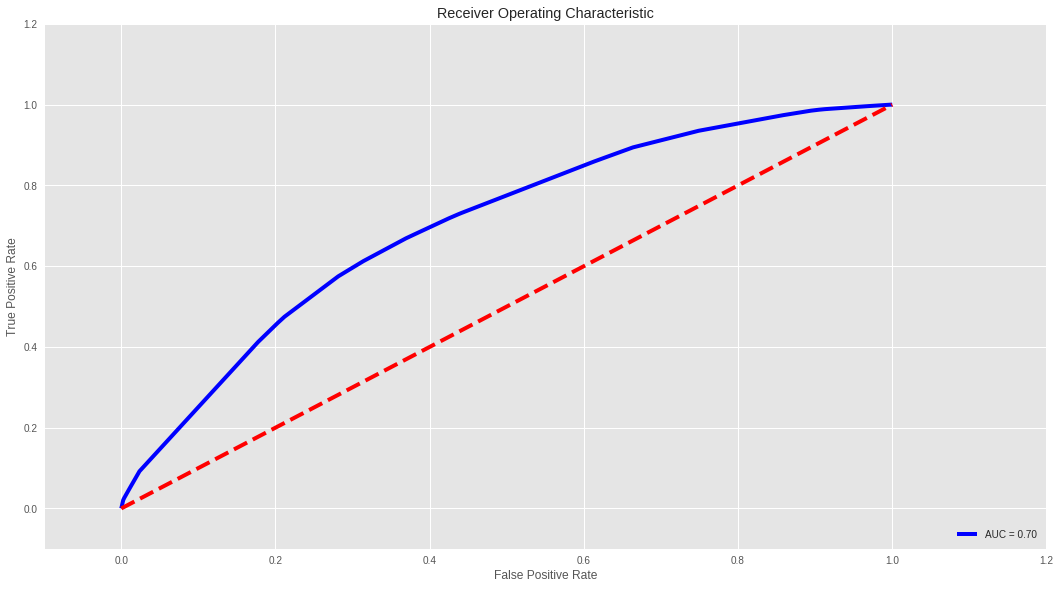

In [141]:
clf_dt = tree.DecisionTreeClassifier(max_depth=5)

model_evaluation(X, y,clf_dt,'depth=5' )

Model: depth=20
accuracy: 0.902
recall: 0.910
precision: 0.883
confusion_matrix:
[[3706  324]
 [ 434 3263]]
auc: 0.975


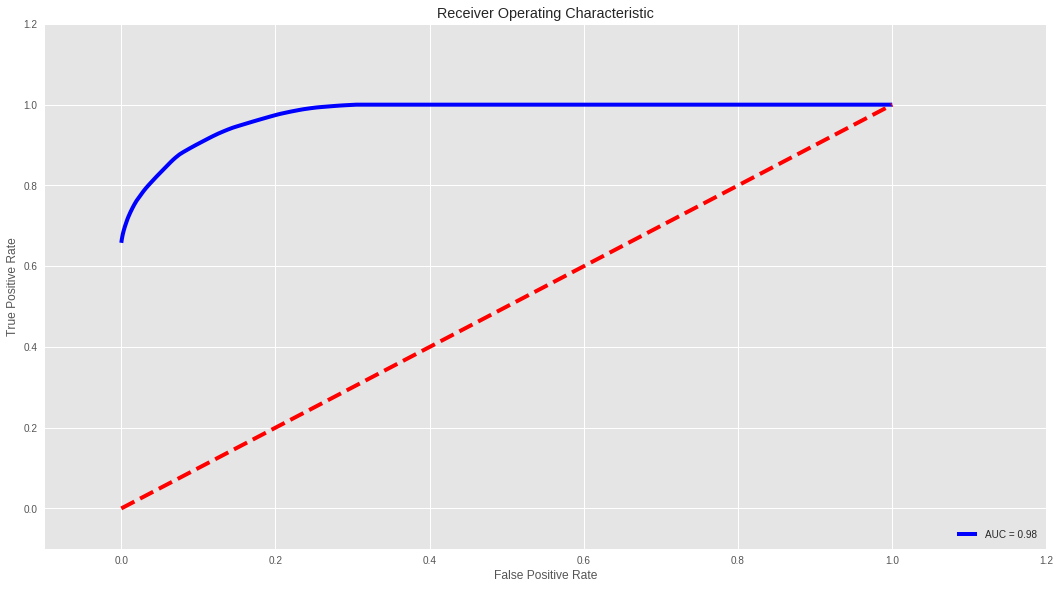

0.97538484358922894

In [131]:
clf_dt = tree.DecisionTreeClassifier(max_depth=16)

model_evaluation(X, y,clf_dt,'depth=20' )

## Cross Validation


In [0]:
from sklearn.model_selection import StratifiedKFold
from scipy import interp



In [0]:
def cross_val(clf,k):
  kf = StratifiedKFold(n_splits=k)
  
  #Store auc score
  kfold_auc = []
  
  
  #Run KFold CV
  for train_index , test_index in kf.split(X,y):
    clf =clf.fit(X.iloc[train_index], y.iloc[train_index])
    proba = clf.predict_proba(X.iloc[test_index] )[:,1]
    auc_score  = roc_auc_score(y.iloc[test_index], proba)
    print auc_score
    kfold_auc_score.append(auc_score)
    
    print "Mean KFold CV" , np.mean(kfold_auc_score)
  

In [143]:
cross_val(clf_dt, 5)

TypeError: ignored

In [0]:
def model_evaluation_crossval(data, target, model, model_name): 
    data = np.array(data)
    target = np.array(target)
    cv = StratifiedKFold(n_splits=5)

    # Create the color options  
    cmap = plt.get_cmap('viridis')
    indices = np.linspace(0, cmap.N, 5)
    colors = [cmap(int(i)) for i in indices]
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    
    # intiate plot
    plt.figure(figsize=(8, 8))
    
    i = 0
    for (train, test) in cv.split(data, target):
        print(train, test)
        probas_ = model.fit(data[train], target[train]).predict_proba(data[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = metrics.roc_curve(target[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, color=colors[i],
                 label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        i = i + 1
    
    # ROC Curve
    mean_tpr /= cv.get_n_splits(data, target)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random')

    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

(array([1410, 1412, 1414, ..., 7724, 7725, 7726]), array([   0,    1,    2, ..., 1737, 1738, 1741]))
(array([   0,    1,    2, ..., 7724, 7725, 7726]), array([1410, 1412, 1414, ..., 3522, 3527, 3528]))
(array([   0,    1,    2, ..., 7724, 7725, 7726]), array([2801, 2802, 2803, ..., 5132, 5134, 5135]))
(array([   0,    1,    2, ..., 7724, 7725, 7726]), array([4168, 4171, 4172, ..., 6416, 6417, 6418]))
(array([   0,    1,    2, ..., 6416, 6417, 6418]), array([5883, 5884, 5885, ..., 7724, 7725, 7726]))


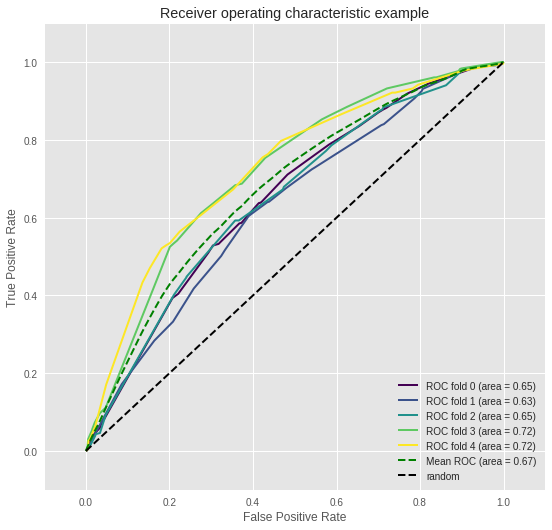

In [149]:
model_evaluation_crossval(X, y, clf_dt, "Shallow")


# Ensemble

In [0]:
from sklearn.ensemble import RandomForestClassifier


(array([1410, 1412, 1414, ..., 7724, 7725, 7726]), array([   0,    1,    2, ..., 1737, 1738, 1741]))
(array([   0,    1,    2, ..., 7724, 7725, 7726]), array([1410, 1412, 1414, ..., 3522, 3527, 3528]))
(array([   0,    1,    2, ..., 7724, 7725, 7726]), array([2801, 2802, 2803, ..., 5132, 5134, 5135]))
(array([   0,    1,    2, ..., 7724, 7725, 7726]), array([4168, 4171, 4172, ..., 6416, 6417, 6418]))
(array([   0,    1,    2, ..., 6416, 6417, 6418]), array([5883, 5884, 5885, ..., 7724, 7725, 7726]))


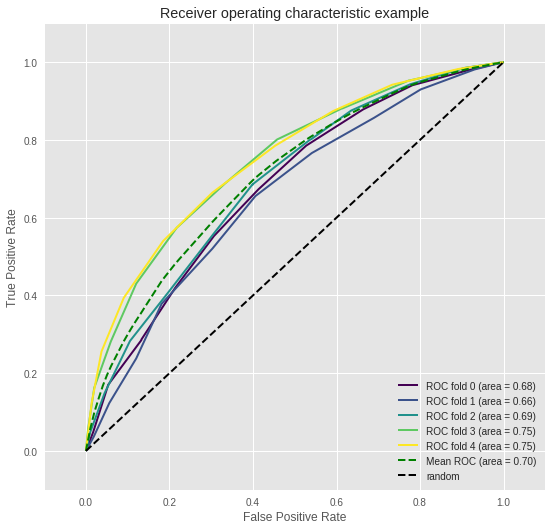

In [157]:
clf_rf = RandomForestClassifier(n_estimators=10)
model_evaluation_crossval(X,y,clf_rf,5)


(array([1410, 1412, 1414, ..., 7724, 7725, 7726]), array([   0,    1,    2, ..., 1737, 1738, 1741]))
(array([   0,    1,    2, ..., 7724, 7725, 7726]), array([1410, 1412, 1414, ..., 3522, 3527, 3528]))
(array([   0,    1,    2, ..., 7724, 7725, 7726]), array([2801, 2802, 2803, ..., 5132, 5134, 5135]))
(array([   0,    1,    2, ..., 7724, 7725, 7726]), array([4168, 4171, 4172, ..., 6416, 6417, 6418]))
(array([   0,    1,    2, ..., 6416, 6417, 6418]), array([5883, 5884, 5885, ..., 7724, 7725, 7726]))


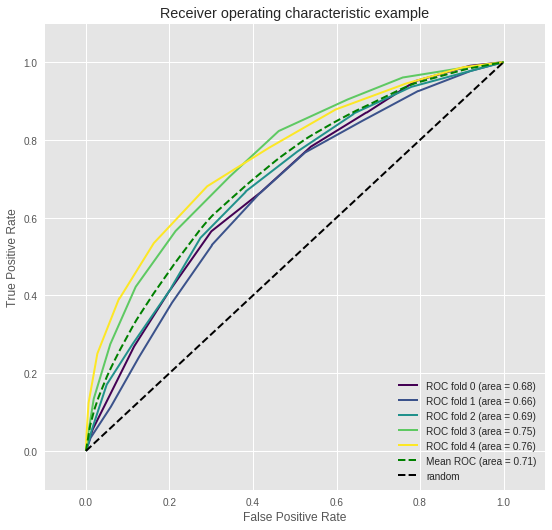

In [158]:
clf_rf = RandomForestClassifier(n_estimators=10, random_state=1235)

model_evaluation_crossval(X,y,clf_rf,5)


# Hyper-parameters Tuning


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [161]:
# Set the parameters by cross-validation
%%timeit -n1 -r1

tuned_parameters = [{'n_estimators': [50,100], 
                     'max_depth': [3, 5, 10, 15]
                    }]
scores = ['roc_auc']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(RandomForestClassifier(n_jobs=-1), 
                       tuned_parameters, cv=5,
                       scoring='%s' % score)
    
    clf.fit(X, y)
    
    
    print(clf.best_params_)
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

# Tuning hyper-parameters for roc_auc
()
{'n_estimators': 100, 'max_depth': 15}
0.680 (+/-0.081) for {'n_estimators': 50, 'max_depth': 3}
0.681 (+/-0.081) for {'n_estimators': 100, 'max_depth': 3}
0.689 (+/-0.082) for {'n_estimators': 50, 'max_depth': 5}
0.688 (+/-0.082) for {'n_estimators': 100, 'max_depth': 5}
0.708 (+/-0.088) for {'n_estimators': 50, 'max_depth': 10}
0.710 (+/-0.093) for {'n_estimators': 100, 'max_depth': 10}
0.725 (+/-0.095) for {'n_estimators': 50, 'max_depth': 15}
0.729 (+/-0.090) for {'n_estimators': 100, 'max_depth': 15}
1 loop, best of 1: 31.8 s per loop


# XGBOOST AND LIGHT GBM are the best models to use for industial approack but internally everything reamins almost the same.

## auto-sklearn will perform all the above stuffs , just give data and boom


---

# Feel free to buzz me.

## Cheers,
## Rahul Kumar
### Chief AI Scientist | BotSupply.ai
### www.hellorahulk.com